In [1]:
# kmeans from scratch
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output
import time


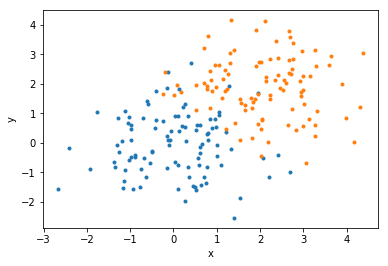

In [2]:
np.random.seed(39)
random_1 = np.random.randn(2,100)
random_2 = np.random.randn(2,100) + 2

plt.plot(random_1[0], random_1[1], '.')
plt.plot(random_2[0], random_2[1], '.')
plt.xlabel('x')
plt.ylabel('y');
plt.show()

In [3]:
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

centers = np.array([[0.,1.], [0.,-1.]]) 

cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])

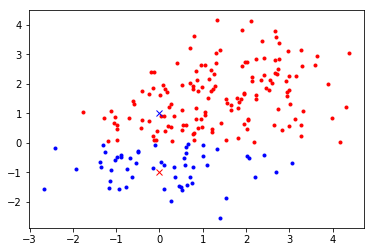

In [4]:
# initial plot without any animation
fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
           np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
           np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
l3, = ax.plot(centers[0,0], centers[0,1], 'bx')
l4, = ax.plot(centers[1,0], centers[1,1], 'rx')

display(fig)

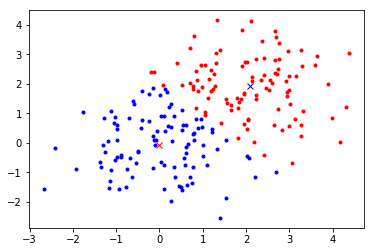

[[ 2.08175585  1.92967372]
 [-0.002154   -0.08932204]] [[ 2.08175585  1.92967372]
 [-0.002154   -0.08932204]]


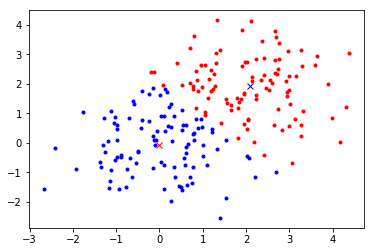

In [5]:
# animated plot
iterat = 0 
while(not (centers ==newc).all()) or iterat < 10:
    print(iterat)
    centers =newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
           np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
           np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    time.sleep(1)
    clear_output(wait=True)
    display(fig)

    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                    np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print(centers, newc)
    iterat += 1
plt.show()
    